In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
%cd "/content/drive/MyDrive/gpt spelled out"

/content/drive/MyDrive/gpt spelled out


In [3]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# build vocabulary

chars = ["."] + sorted(list(set("".join(words))))
stoi = { s:i for i,s in enumerate(chars) } # string to integer
itos = { i:s for s,i in stoi.items() } # integer to string

In [5]:
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [125]:
block_size = 3
X, Y = [], []

for w in words:
  context = [0] * block_size
  for ch in w + ".":
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [126]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [159]:
n = len(X)
n

228146

In [128]:
print("Context (X) ---> Label (Y)")
print("--------------------------")
length = 20

for x, y in zip(X[:10], Y[:10]):
  xstr = x.__str__()
  while len(xstr) != length:
    xstr += " "
  print(f"{xstr} ---> {y}")

Context (X) ---> Label (Y)
--------------------------
tensor([0, 0, 0])    ---> 5
tensor([0, 0, 5])    ---> 13
tensor([ 0,  5, 13]) ---> 13
tensor([ 5, 13, 13]) ---> 1
tensor([13, 13,  1]) ---> 0
tensor([0, 0, 0])    ---> 15
tensor([ 0,  0, 15]) ---> 12
tensor([ 0, 15, 12]) ---> 9
tensor([15, 12,  9]) ---> 22
tensor([12,  9, 22]) ---> 9


In [129]:
# C is our embedding/lookup table
C = torch.randn((27, 2)) # embedding dimension is 2

In [130]:
C[5] # the embedding for character 5, which is "d"

tensor([-0.1316,  0.7235])

In [131]:
# we can also use one hot encoding and mat mul
hot5 = F.one_hot(torch.tensor(5), num_classes=27).float()
hot5

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [132]:
# hot5 @    C    = em
# (27) @ (27, 2) = (2)

em = hot5 @ C
em

tensor([-0.1316,  0.7235])

In [133]:
# We will use indices instead of one-hot for simplicity

In [134]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [135]:
# C is our embedding/lookup table
C = torch.randn((27, 2)) # embedding dimension is 2

In [136]:
C[5]

tensor([0.9750, 1.1886])

In [137]:
C[[5, 6, 7]] # get multiple embeddings

tensor([[ 0.9750,  1.1886],
        [ 0.6144, -0.3305],
        [-0.9158,  0.6878]])

In [138]:
C[X[11]] # get embeddings for 11th example in X

tensor([[-0.6409, -1.3547],
        [-0.1538,  0.6990],
        [ 0.8039, -0.5790]])

In [139]:
C[X] # get embeddings for each example in X, for each word in each example

tensor([[[-0.0611,  0.0990],
         [-0.0611,  0.0990],
         [-0.0611,  0.0990]],

        [[-0.0611,  0.0990],
         [-0.0611,  0.0990],
         [ 0.9750,  1.1886]],

        [[-0.0611,  0.0990],
         [ 0.9750,  1.1886],
         [ 0.0507,  0.7062]],

        ...,

        [[-0.3449,  1.2757],
         [-0.3449,  1.2757],
         [ 2.2656, -2.1836]],

        [[-0.3449,  1.2757],
         [ 2.2656, -2.1836],
         [-0.3449,  1.2757]],

        [[ 2.2656, -2.1836],
         [-0.3449,  1.2757],
         [-1.4179, -1.3742]]])

In [140]:
C[X].shape # (examples, context, embeddings)

torch.Size([228146, 3, 2])

In [141]:
C[X][11] # embeddings for 11th example

tensor([[-0.6409, -1.3547],
        [-0.1538,  0.6990],
        [ 0.8039, -0.5790]])

In [ ]:
"""
tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13]])
shape: (3, 3)

Each index is converted to its corresponding embedding:

tensor([[[ 0.2218, -1.5494], [ 0.2218, -1.5494], [ 0.2218, -1.5494]],
        [[ 0.2218, -1.5494], [ 0.2218, -1.5494], [-0.4384, -0.6298]],
        [[ 0.2218, -1.5494], [-0.4384, -0.6298], [ 2.5651,  1.4879]]])
shape: (3, 3, 2)
"""

# You can think of it as replacing each index in X with its corresponding embedding

In [142]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [143]:
# Next, we would like to concatenate the embeddings of each word in each example
#             pytorch infers that -1 = 32
cat = emb.view(-1, 6)
cat.shape

torch.Size([228146, 6])

In [144]:
cat[0] # first example, the three words have been concatenated

tensor([-0.0611,  0.0990, -0.0611,  0.0990, -0.0611,  0.0990])

In [145]:
cat[1] # second example, the three words have been concatenated

tensor([-0.0611,  0.0990, -0.0611,  0.0990,  0.9750,  1.1886])

In [146]:
# convert each 6-dimensional vector into a 100-dimensional vector
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [147]:
m = cat @ W1
m.shape

torch.Size([228146, 100])

In [148]:
z = m + b1 # b1 will be broadcasted for each example
z.shape

torch.Size([228146, 100])

In [149]:
h = torch.tanh(z)
h.shape

torch.Size([228146, 100])

In [150]:
# convert 100-dimensional vectors to logits (27-dimensional)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [151]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [152]:
# convert logits to probabilities (softmax)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([228146, 27])

In [153]:
prob[0].sum(), prob[1].sum() # ...

(tensor(1.), tensor(1.))

In [154]:
# For the first example, what is the label?
Y[0]

tensor(5)

In [155]:
# What is the probability that the model produced for the correct label?
prob[0, 5]

tensor(0.0004)

In [82]:
# Okay, how can we find the probability of the correct label for all examples?

In [160]:
torch.arange(n)

tensor([     0,      1,      2,  ..., 228143, 228144, 228145])

In [157]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [161]:
prob[torch.arange(n), Y]

tensor([3.7444e-04, 3.2347e-09, 1.1847e-03,  ..., 1.6854e-10, 7.2579e-03,
        4.7414e-08])

In [162]:
# Now we have our probabilities
# Let's calculate the negative log likelihood loss
loss = -prob[torch.arange(n), Y].log().mean()
loss

tensor(14.6566)

In [87]:
# ---------------------- REFORMULATION -------------------------------

In [332]:
context_length = 3

In [333]:
def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * context_length
    for ch in w + ".":
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [334]:
# build training, dev, test sets

import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22740, 3]) torch.Size([22740])
torch.Size([22826, 3]) torch.Size([22826])


In [335]:
embed_dim = 10
hidden_layer_dim = 200

In [336]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, embed_dim), generator=g)

W1 = torch.randn((embed_dim*context_length, hidden_layer_dim), generator=g)
b1 = torch.randn(hidden_layer_dim, generator=g)

W2 = torch.randn((hidden_layer_dim, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters =[C, W1, b1, W2, b2]

In [337]:
sum(p.nelement() for p in parameters) # number of parameters

11897

In [338]:
for p in parameters:
  p.requires_grad = True

In [339]:
def calc_loss(X, Y):
  emb = C[X] # (n, context_length, embed_dim)
  cat = emb.view(-1, embed_dim*context_length) # (n, context_length*embed_dim)
  h = torch.tanh(cat @ W1 + b1) # (n, 100)
  logits = h @ W2 + b2 # (n, 27)
  loss = F.cross_entropy(logits, Y)
  print(loss.item())

In [340]:
batch_size = 32

In [350]:
for k in range(50000):
  # get minibatch indices
  ix = torch.randint(0, len(Xtr), (batch_size,)) # pick batch_size random indices

  # forward pass
  emb = C[Xtr[ix]] # (b, context_length, embed_dim)
  cat = emb.view(-1, context_length*embed_dim) # (b, context_length*embed_dim)
  h = torch.tanh(cat @ W1 + b1) # (b, hidden_dim)
  logits = h @ W2 + b2 # (b, 27)
  # counts = logits.exp()
  # probs = counts / counts.sum(1, keepdim=True)
  # loss = -prob[torch.arange(b), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = 0.1
  # lr = 0.01
  lr = 0.001
  for p in parameters:
    p.data -= lr * p.grad

In [351]:
calc_loss(Xtr, Ytr)

2.1165072917938232


In [352]:
calc_loss(Xdev, Ydev)

2.1684868335723877


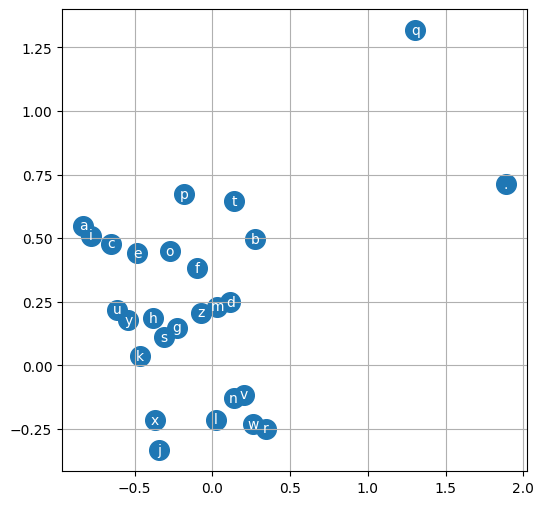

In [354]:
# visualize embeddings, only makes sense when embed_dim=2

plt.figure(figsize=(6, 6))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")